### Logistic Regression from scratch- For Binary Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.metrics import accuracy_score
numpy.random.seed(42)

### Training data and training label

#### Creating dataset- 

In [3]:
c1 = [2,3]# Cluster center for class 1 data
c2 = [10,11]# Cluster center for class 2 data
no = 50 # No of samples in a class
class1 = np.matlib.repmat(c1,no,1) + np.random.randn(no,len(c1))
class2 = np.matlib.repmat(c2, no,1)+ np.random.randn(no,len(c2))
D = np.append(class1,class2,axis =0)
Data = np.concatenate((D, np.ones((2*no,1))),axis = 1)
c1_label = np.ones((no,1))
c2_label = -1*np.ones((no,1))
label = np.concatenate((c1_label,c2_label),axis = 0)
Data = Data.T
y = label.T# True label

#### Plotting data

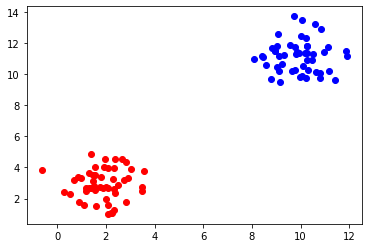

In [4]:
import matplotlib.pyplot as plt
plt.plot(class1[:,0],class1[:,1],'ro',class2[:,0],class2[:,1],'bo')
plt.show()

### Validation data

In [5]:
v1 = [5,4]# Cluster center for class1 data of validation data set
v2 = [7,12]# Cluster center for class 2 data of validation data set
v_no = 30# No of samples in a class
v_class1 = np.matlib.repmat(v1,v_no,1) + np.random.randn(v_no,len(v1))
v_class2 = np.matlib.repmat(v2, v_no,1)+ np.random.randn(v_no,len(v2))
v_D = np.append(v_class1,v_class2,axis =0)
v_Data = np.concatenate((v_D, np.ones((2*v_no,1))),axis = 1)
v_c1_label = np.ones((v_no,1))
v_c2_label = -1*np.ones((v_no,1))
v_label = np.concatenate((v_c1_label,v_c2_label),axis = 0)
v_Data = v_Data.T
v_y = v_label.T# Test label

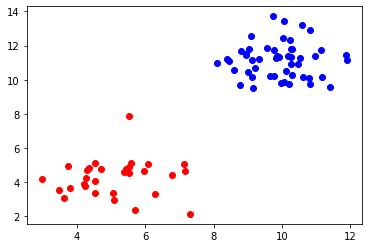

In [6]:
import matplotlib.pyplot as plt
plt.plot(v_class1[:,0],v_class1[:,1],'ro',class2[:,0],class2[:,1],'bo')
plt.show()

#### The activation function used is sigmoid

In [7]:
def sigmoid(x):
    a  = 1/(1+np.exp(-x))
    return a

In [8]:
def prediction(w, Data):
    pred = []
    z = np.dot(w,Data)
    a = sigmoid(z)
    for i in range(0,len(a[0])):
        if (a[0][i] > 0.5): 
            pred.append(1)
        elif (a[0][i] <= 0.5):
            pred.append(-1)
    return pred

<img src="images\lr.jpg">

### Training part- In this step the loss is calculated and minimized with respect to weights. 

In [9]:
learning_rate = 0.01
w = np.random.randn(1,3)
print(Data)
for i in range(1,1500):
    
    z = np.dot(w,Data)
    y_pred = prediction(w, Data)
    val = -np.multiply(y,z)
    J = np.sum(np.log(1+np.exp(val)))
    num = -np.multiply(y,np.exp(val))
    den = 1+np.exp(val)
    f = num/den
    gradJ = np.dot(Data,f.T)
    w = w - learning_rate*gradJ.T

    #print("Epoch",i,"Loss",J,"Training Accuracy",accuracy_score(y[0], y_pred)*100)


[[ 2.49671415  2.64768854  1.76584663  3.57921282  1.53052561  1.53658231
   2.24196227  0.27508217  0.98716888  1.09197592  3.46564877  2.0675282
   1.45561728  0.84900642  1.39936131  1.39829339  1.98650278  2.82254491
   2.2088636   0.67181395  2.73846658  1.88435172  0.52147801  1.53936123
   2.34361829  2.32408397  1.323078    3.03099952  1.16078248  2.33126343
   1.52082576  0.89366503  2.81252582  1.92798988  2.36163603  2.36139561
   1.96417396 -0.6197451   2.08704707  2.09176078  1.78032811  3.47789404
   1.1915064   2.91540212  1.4702398   2.09707755  1.29794691  1.60789185
   2.29612028  2.00511346  8.58462926  9.65728548  9.83871429 11.8861859
  10.25755039  8.08122878 10.06023021  9.80763904  9.96528823 11.14282281
  10.79103195 11.40279431 10.58685709  9.00946367 10.09965137  8.44933657
   8.93769629  9.08057577  9.21674671 10.81351722 10.22745993  8.39251677
  10.25988279  8.76304929 10.52194157 10.25049285  9.31997528 10.29307247
  11.86577451  8.8086965   9.02531833 11

## Prediction for test data

In [10]:
Test_predict = prediction(w, v_Data)
print("Test Accuracy",accuracy_score(v_y[0], Test_predict)*100)

Test Accuracy 88.33333333333333


## Classifier

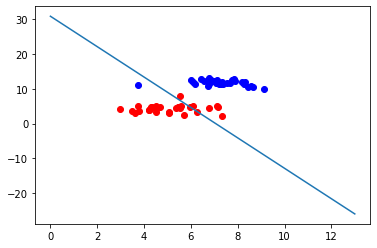

In [11]:
domain =  np.linspace(0,13,100)
h_x = -(w[0,0]/w[0,1])*domain - (w[0,2]/w[0,1])

plt.plot(v_class1[:,0],v_class1[:,1],'ro',v_class2[:,0],v_class2[:,1],'bo')
plt.plot(domain,h_x)
plt.show()